## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Read file

In [2]:
df=pd.read_csv(r'C:weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## See some details

In [3]:
df.shape

(145460, 23)

In [4]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

## Handling the missing values

In [5]:
msk = df['Cloud3pm'].isna()
df.loc[msk, 'Cloud3pm'] = [df.loc[min(0, i-3):i+3, 'Cloud3pm'].mode().iloc[0] for i in  df.index[msk]]

In [6]:
msk = df['Cloud9am'].isna()
df.loc[msk, 'Cloud9am'] = [df.loc[min(0, i-3):i+3, 'Cloud9am'].mode().iloc[0] for i in  df.index[msk]]

In [7]:
df.dropna(subset=['RainToday','RainTomorrow'],inplace=True)

In [8]:
msk = df['Temp9am'].isna()
df.loc[msk, 'Temp9am'] = [df.loc[min(0, i-3):i+3, 'Temp9am'].mode().iloc[0] for i in  df.index[msk]]

In [9]:
msk = df['Pressure3pm'].isna()
df.loc[msk, 'Pressure3pm'] = [df.loc[min(0, i-3):i+3, 'Pressure3pm'].mode().iloc[0] for i in  df.index[msk]]

In [10]:
msk = df['Pressure9am'].isna()
df.loc[msk, 'Pressure9am'] = [df.loc[min(0, i-3):i+3, 'Pressure9am'].mode().iloc[0] for i in  df.index[msk]]

In [11]:
df.dropna(subset=['WindGustSpeed'],inplace=True)

In [12]:
df['Temp3pm'].fillna(df['Temp3pm'].mean(), inplace=True)

In [13]:
df['Sunshine'].fillna(method='ffill',inplace=True)

In [14]:
df['Evaporation'].fillna(method='bfill',inplace=True)


In [15]:
df.dropna(subset=['Sunshine'],inplace=True)

In [16]:
msk = df['WindDir9am'].isna()
df.loc[msk, 'WindDir9am'] = [df.loc[min(0, i-3):i+3, 'WindDir9am'].mode().iloc[0] for i in  df.index[msk]]

In [17]:
df['Humidity3pm'].fillna(df['Humidity3pm'].mean(), inplace=True)

In [18]:
df['Humidity9am'].fillna(df['Humidity9am'].mean(), inplace=True)

In [19]:
df.dropna(subset=['Evaporation','WindDir3pm','MinTemp','WindSpeed9am','MaxTemp','WindGustDir'],inplace=True)

In [20]:
df.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [21]:
df.shape

(123265, 23)

## Do some preprocess

In [22]:
import datetime
df["Date"] = pd.to_datetime(df["Date"])
df["month"] = df["Date"].dt.month

In [23]:
df.drop(['Date'],axis=1,inplace=True)

In [24]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['RainToday']= label_encoder.fit_transform(df['RainToday'])
df['Location']= label_encoder.fit_transform(df['Location'])
df['WindGustDir']= label_encoder.fit_transform(df['WindGustDir'])
df['WindDir9am']= label_encoder.fit_transform(df['WindDir9am'])
df['WindDir3pm']= label_encoder.fit_transform(df['WindDir3pm'])
df['RainTomorrow']= label_encoder.fit_transform(df['RainTomorrow'])

In [25]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,month
6049,7,17.9,35.2,0.0,12.0,12.3,11,48.0,1,12,...,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0,1
6050,7,18.4,28.9,0.0,14.8,13.0,8,37.0,10,10,...,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0,1
6052,7,19.4,37.6,0.0,10.8,10.6,5,46.0,5,6,...,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0,1
6053,7,21.9,38.4,0.0,11.4,12.2,14,31.0,14,15,...,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0,1
6054,7,24.2,41.0,0.0,11.2,8.4,14,35.0,7,14,...,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123265 entries, 6049 to 143879
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       123265 non-null  int32  
 1   MinTemp        123265 non-null  float64
 2   MaxTemp        123265 non-null  float64
 3   Rainfall       123265 non-null  float64
 4   Evaporation    123265 non-null  float64
 5   Sunshine       123265 non-null  float64
 6   WindGustDir    123265 non-null  int32  
 7   WindGustSpeed  123265 non-null  float64
 8   WindDir9am     123265 non-null  int32  
 9   WindDir3pm     123265 non-null  int32  
 10  WindSpeed9am   123265 non-null  float64
 11  WindSpeed3pm   123265 non-null  float64
 12  Humidity9am    123265 non-null  float64
 13  Humidity3pm    123265 non-null  float64
 14  Pressure9am    123265 non-null  float64
 15  Pressure3pm    123265 non-null  float64
 16  Cloud9am       123265 non-null  float64
 17  Cloud3pm       123265 non-

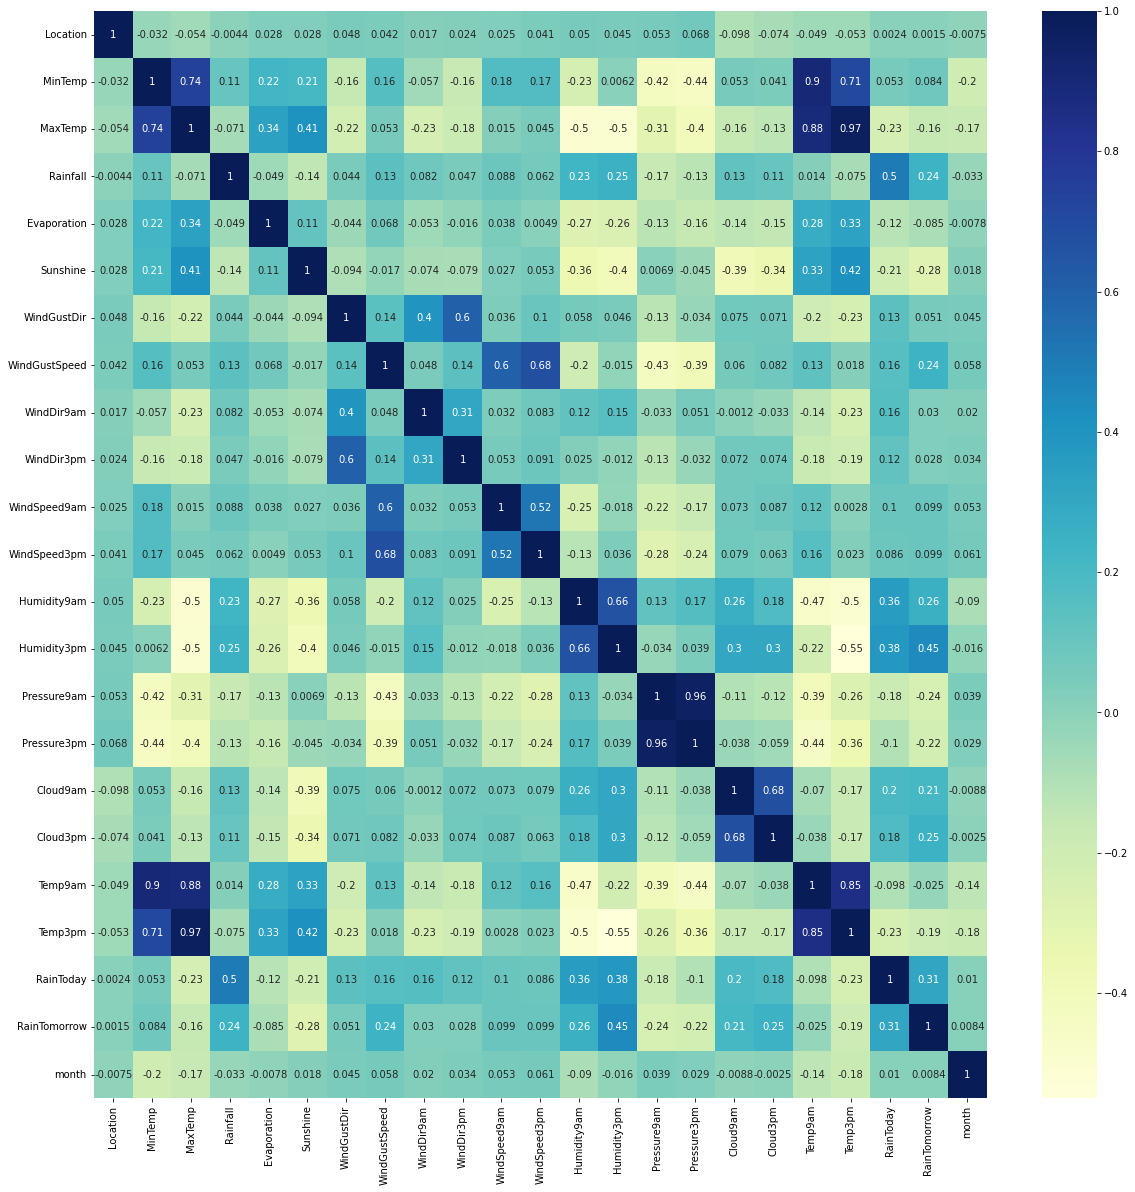

In [27]:
fig,ax=plt.subplots(figsize=(20,20))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True,cmap="YlGnBu")
plt.show()

## Remove outliers

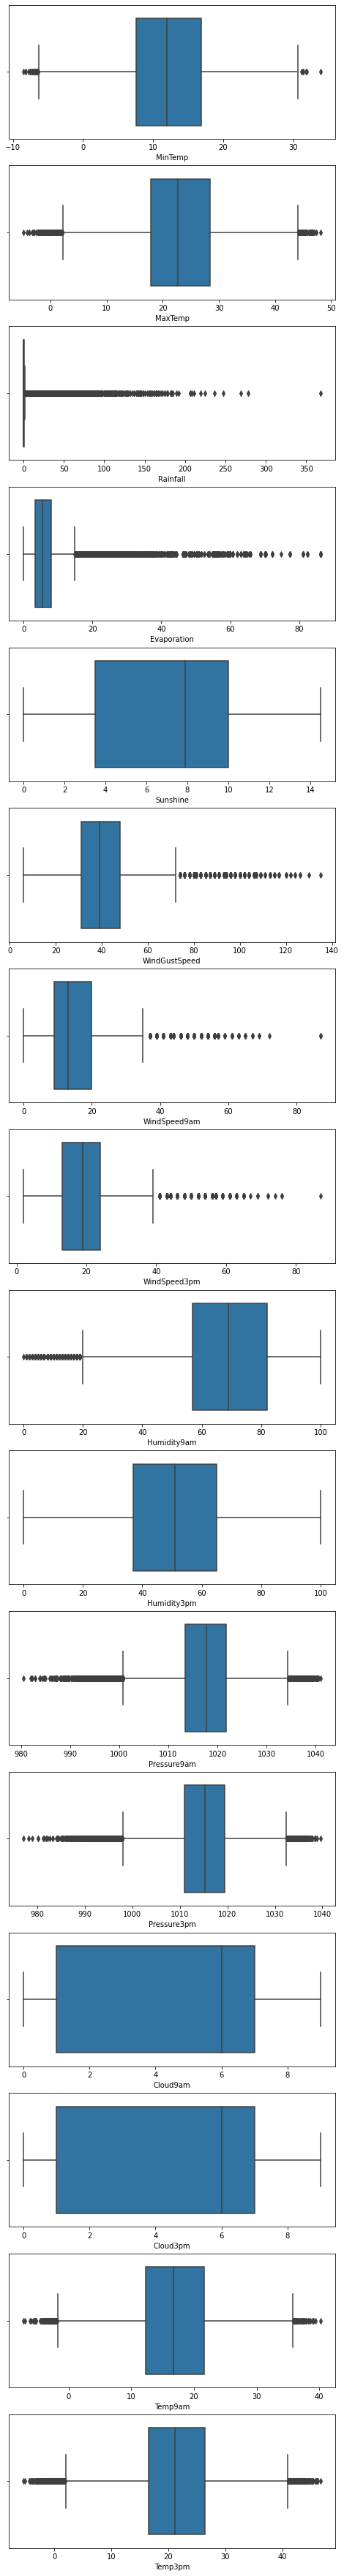

In [28]:
df_float = df.select_dtypes(include='float64')
cols = df_float.columns
fig = plt.figure(figsize = (8, len(cols)* 4))
gs = fig.add_gridspec(len(cols), 1)
ax = [fig.add_subplot(gs[i, 0]) for i in range(len(cols))]
for i in range(len(ax)):
    sns.boxplot(x=df[cols[i]], ax = ax[i])


In [29]:
df = df[df['Rainfall'] < 260]
df = df[df['WindGustSpeed'] <= 120]
df = df[df['Evaporation'] <= 75]
df = df[df['WindSpeed3pm'] <= 70]
df = df[df['WindSpeed9am'] <= 80]
df = df[df['Humidity9am'] >= 12]
df = df[df['Pressure9am'] >= 985]
df = df[df['Pressure3pm'] >= 985]

In [30]:
df.shape

(122792, 23)

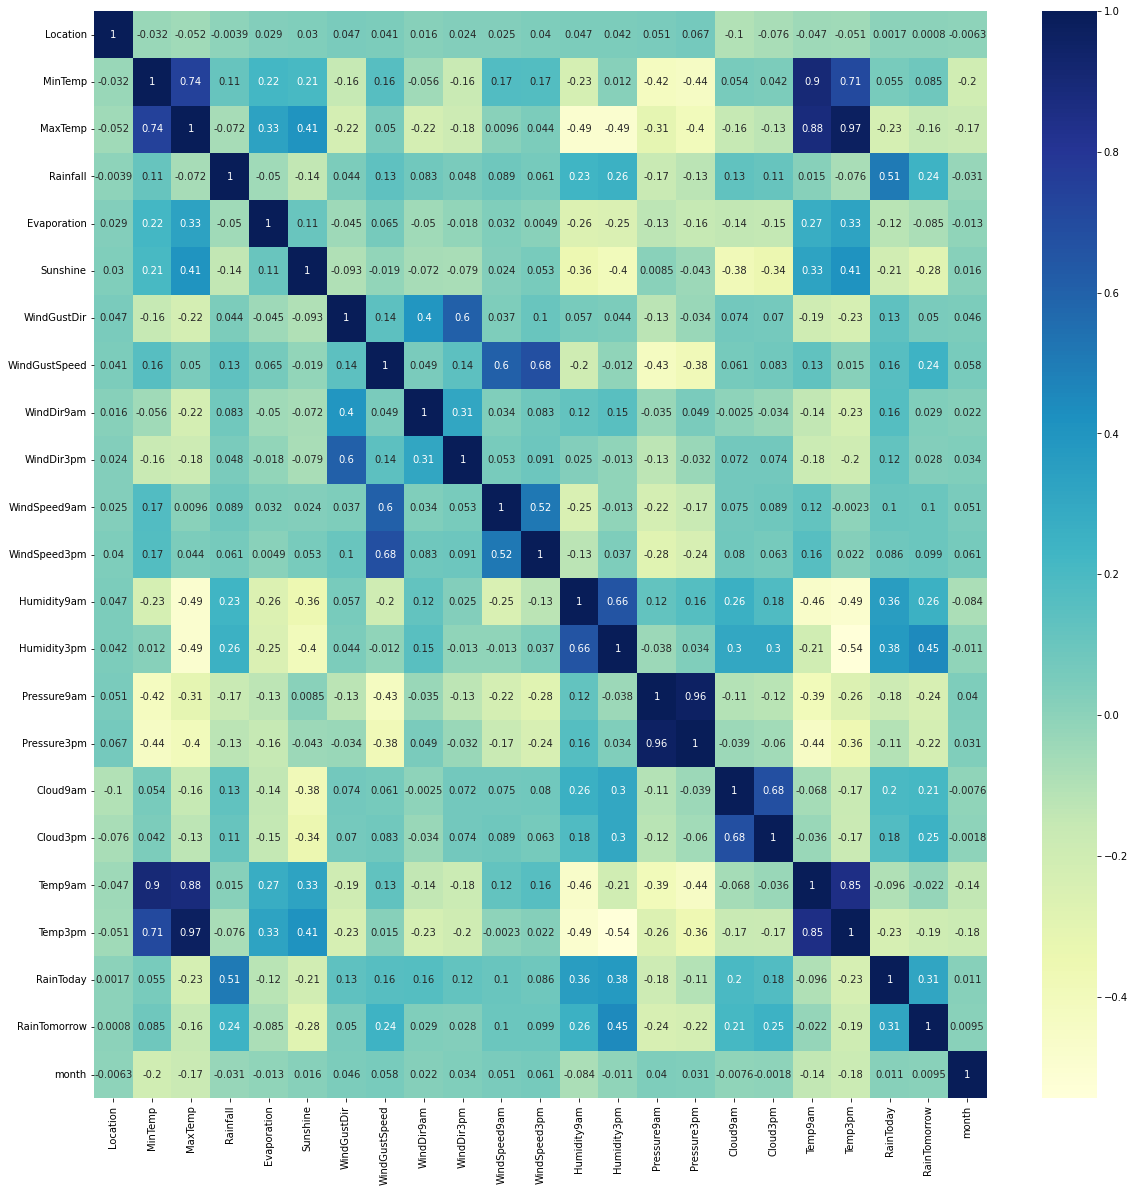

In [31]:
fig,ax=plt.subplots(figsize=(20,20))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True,cmap="YlGnBu")
plt.show()

## Make model

In [32]:
np.random.seed(7)
X=df.drop(['RainTomorrow'],axis=1)
y=df['RainTomorrow']

In [33]:
from sklearn.model_selection import train_test_split
np.random.seed(7)
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.2)

In [34]:
from sklearn.linear_model import LogisticRegression
LR_model=LogisticRegression(max_iter=2000,penalty='elasticnet',solver='saga',l1_ratio=0.5)
LR_model.fit(train_x,train_y)

LogisticRegression(l1_ratio=0.5, max_iter=2000, penalty='elasticnet',
                   solver='saga')

In [35]:
y_pred=LR_model.predict(test_x)

In [36]:
LR_model.score(train_x, train_y)

0.8470167866195678

In [37]:
from sklearn.metrics import f1_score
f1_score(test_y,y_pred)

0.5952928297755883

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y,y_pred)

0.8494645547457144

In [39]:
from sklearn.ensemble import RandomForestClassifier
RF_model=RandomForestClassifier(n_estimators=1000,criterion= "entropy")
RF_model.fit(train_x,train_y)

RandomForestClassifier(criterion='entropy', n_estimators=1000)

In [40]:
y_pred_=RF_model.predict(test_x)

In [41]:
RF_model.score(train_x, train_y)

1.0

In [42]:
from sklearn.metrics import f1_score
f1_score(test_y,y_pred_)

0.625207480358526

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y,y_pred_)

0.8620872185349566